In [60]:
import numpy as np
import scipy
import scipy.signal 
import h5py
import matplotlib.pyplot as plt


In [71]:
# Load the data in a dictionnary
data={'ActivPark': h5py.File('samples/L23_f09_as_PARK.mat','r'), 
      'SWAPark': h5py.File('samples/L23_f03_swa_PARK.mat','r'), 
     'ActivCtl': h5py.File('samples/A9_c05_as_CTL.mat','r'), 
     'SWACtl': h5py.File('samples/A9_c01_swa_CTL.mat','r')}

# Look at the variable names in each data file
for key,value in data.items():
    print(key)
    print(data[key].keys())

ActivPark
<KeysViewHDF5 ['L23_Beat_cycl', 'L23_Beta_EEG', 'L23_EEGipsi', 'L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9']>
SWAPark
<KeysViewHDF5 ['L23_EEGipsi', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr23_c0F', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_7']>
ActivCtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E', 'A9_Pr17_c01', 'A9_Pr17_c10', 'A9_Pr1_c01', 'A9_Pr22_c12', 'A9_Pr22_c13', 'A9_Pr2_c02', 'A9_Pr2_c1B', 'A9_Pr6_c05', 'A9_Pr8_c07', 'A9_Pr8_c08', 'A9_SS_Pr_25', 'A9_SS_Pr_3', 'A9_SS_Pr_4', 'A9_SS_Pr_9']>
SWACtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E',

In [72]:
# Look up variable in a specific dataset
dict(data['ActivPark']['L23_Pr20_c09'])

{'comment': <HDF5 dataset "comment": shape (33, 1), type "<u2">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'resolution': <HDF5 dataset "resolution": shape (1, 1), type "<f8">,
 'times': <HDF5 dataset "times": shape (1, 725), type "<f8">,
 'title': <HDF5 dataset "title": shape (8, 1), type "<u2">}

In [73]:
# Select a few datasets to work with: EEG and 3 spike trains from parkinsonian animals in 'activated state'
EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
ST2=data['ActivPark']['L23_Pr20_c0A']
ST3=data['ActivPark']['L23_Pr20_c0B']
dict(EEG)

{'comment': <HDF5 dataset "comment": shape (10, 1), type "<u2">,
 'interval': <HDF5 dataset "interval": shape (1, 1), type "<f8">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'offset': <HDF5 dataset "offset": shape (1, 1), type "<f8">,
 'scale': <HDF5 dataset "scale": shape (1, 1), type "<f8">,
 'start': <HDF5 dataset "start": shape (1, 1), type "<f8">,
 'title': <HDF5 dataset "title": shape (7, 1), type "<u2">,
 'units': <HDF5 dataset "units": shape (2, 1), type "<u2">,
 'values': <HDF5 dataset "values": shape (1, 35715), type "<f8">}

In [74]:
# Find the number of sampling points in EEG trace (EEG[values])


35715 sampling points


In [75]:
# Find the duration of the recording as number of points time sampling interval (EEG[interval])


Recording duration: 100 s


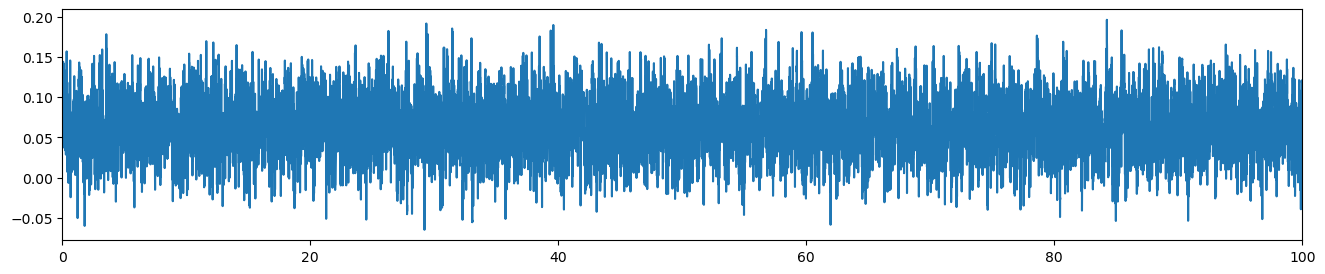

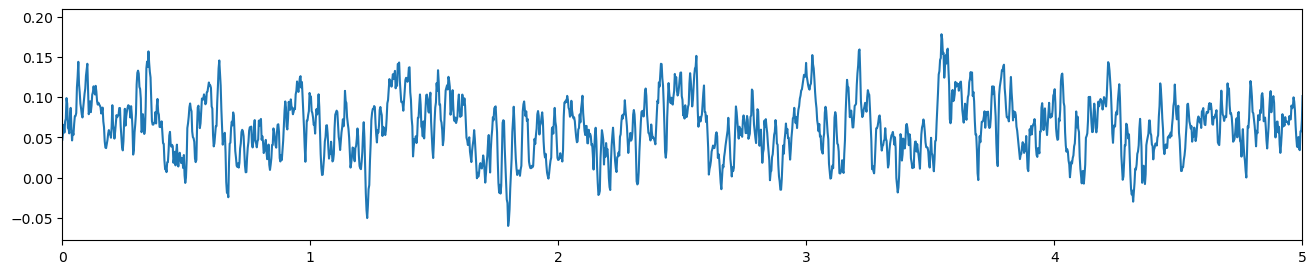

In [80]:
# Look up the 1000 first points in EEG trace



In [89]:
# Compute the spectral power density histogram (spectrum) of the EEG trace using scipy.signal.welch


[0.04707336 0.05592346 0.06561279 0.05592346 0.06973267 0.07324219
 0.09887695 0.0919342  0.06164551 0.06080627 0.05500793 0.07705688
 0.08666992 0.06370544 0.04615784 0.0567627  0.05310059 0.06660461
 0.07629395 0.07659912 0.08026123 0.11238098 0.12542725 0.14404297
 0.11634827 0.10604858 0.0920105  0.08583069 0.07835388 0.07476807
 0.08636475 0.0958252  0.10437012 0.11070251 0.12664795 0.13458252
 0.14160156 0.10757446 0.07881165 0.08300781 0.09483337 0.08132935
 0.08934021 0.10299683 0.10620117 0.11352539 0.10719299 0.1033783
 0.11413574 0.10688782 0.09483337 0.09078979 0.09307861 0.09101868
 0.08956909 0.08743286 0.07965088 0.08262634 0.08705139 0.06988525
 0.06263733 0.04501343 0.03723145 0.03662109 0.04165649 0.04684448
 0.05462646 0.05905151 0.05401611 0.05378723 0.04951477 0.06324768
 0.09002686 0.06515503 0.05973816 0.04844666 0.05683899 0.06797791
 0.07766724 0.07507324 0.0769043  0.07843018 0.08651733 0.08651733
 0.0642395  0.05180359 0.0378418  0.03379822 0.0453949  0.06996

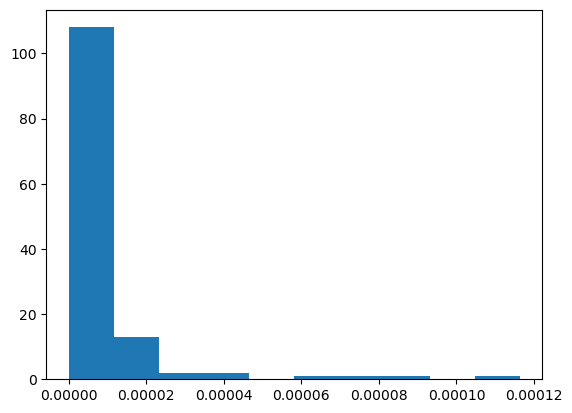

In [95]:
# Look up spike times for the two spike trains


In [ ]:
# Make an instantaneous firing rate in bins of 1 ms using the function np.histogram


In [ ]:
# Plot the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 for delays from -250ms to +250ms


In [ ]:
# Smooth the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 
# and plot for delays from -50ms to +50ms


In [ ]:
# Repeat the same procedure (cells 11 and 12) for spike trains 2 and 3


In [ ]:
# Repeat the procedure (cell 11 and 12) for all pairs of spike trains recorded in this file (ActivPark)
# To this end, you may use the 'keys' of the dataset, corresponding to the various signals recorded simultaneously. 
# Note that the first 3 signals correspond to EEG or filtered EEG and will not be considered here. All other 
# recorded signals are spike trains 

keys=list(data['ActivPark'].keys())
print(keys, len(keys))


In [ ]:
# Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with function scipy.signal.coherence

# Plot a vertical line at maximal coherence and get the corresponding frequency using the function plt.axvline


In [ ]:
# We now want to compute the coherence between the EEG and the firing rates of single spike trains. 
# However, the coherence needs to be computed on signals that have the same sampling interval/rate

# First step: Recompute the IFR for a time bin similar to EEG sampling interval
# Second step: Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with new time bin
# This coherence can compared to the one computed in cell 13.


# Plot a vertical line at maximal coherence and get the corresponding frequency


In [ ]:
# Now we can compute the coherence between instantaneous firing rate (IFR) of a spike train and the EEG


# Plot a vertical line at maximal coherence and get the corresponding frequency


In [ ]:
# Let's now look up a file with SWA activity in the cortex, and plot the 5 first seconds of this EEG
EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]
print(1/EEG_interval)

plt.plot(EEG_data[:int(5/EEG_interval)]);

In [ ]:
# Build a band pass filter with [0.5 1.5] Hz band for EEG using scipy.signal.butter


In [ ]:
# Filter EEG with scipy.signal.filtfilt using the filter built in cell 18, and plot first 5 s of filtered EEG


In [ ]:
# Load one spike train and the EEG values and sampling interval from the SWAPark file
ST1=data['SWAPark']['L23_Pr20_c09'] 
ST1_times=ST1['times'][0]
print(len(ST1_times))

EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]


# Compute the spike-triggered average of the EEG trace with the first spike train

windowsec=2; windowint=windowsec/EEG_interval; 
t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
STA=np.zeros(int(windowint))
i1=np.argmin(np.abs(ST1_times-windowsec))
i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
print(ST1_times[i1])
print(ST1_times[i2])
for i in range(i1,i2):
    STA += EEG_data[int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST1_times[i+1]/EEG_interval)+int(windowint/2)]

STA=STA/(len(ST1_times)-2)
STA=STA-np.mean(STA)
plt.plot(t,STA);

# Value of the spike-triggered average at 0 time lag
print(STA[int(windowint/2)])


In [ ]:
# Compute and plot the spike-triggered averages of the EEG with respect to all spike trains recorded in this SWAPark file
# You may use the keys of the data['SWAPark'] data set
# Save the value of the spike-triggered average at 0 time lag for all considered spike trains


In [ ]:
# For each spike train in the data set, compute the mean firing rate 

# Plot the mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag